# Исследование сервиса аренды самокатов GoFast.

Предоставлены данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Цель исследования:
1. Установить, тратят ли пользователи с подпиской больше времени на поездки
2. Проверить гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров
3. Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
4. Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%


# 1. Загрузка данных: обзор и предобработка

In [1]:
from scipy import stats as st

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import numpy as np

#### Шаг 1. Загрузка данных

In [6]:
def load(df):
        print ('Первые 10 строк таблицы:')
        print ()
        display (df.head(10))
        print ()
        print ('Иноформация о таблице:')
        print ()
        display (df.info())
        print ()
        print ('Количество дубликатов в таблице:')
        print ()
        display (df.duplicated().sum())
        print ()
        print ('Количество пропуска в таблице:')
        print ()
        display (df.isna().sum())

In [7]:
users = pd.read_csv('/datasets/users_go.csv')

In [8]:
rides = pd.read_csv('/datasets/rides_go.csv')

In [9]:
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

##### Выведем первые 10 строк таблицы, содержащей информацию о пользователях. Изучим общую информацию о датафрейме.

In [10]:
load(users)

Первые 10 строк таблицы:



,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra



Иноформация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None


Количество дубликатов в таблице:



31


Количество пропуска в таблице:



user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

##### Выведем первые 10 строк таблицы, содержащей информацию о поездках каждого пользователя. Изучим общую информацию о датафрейме.

In [11]:
load(rides)

Первые 10 строк таблицы:



,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22



Иноформация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None


Количество дубликатов в таблице:



0


Количество пропуска в таблице:



user_id     0
distance    0
duration    0
date        0
dtype: int64

##### Выведем таблицу, содержащую информацию о подписках. Изучим общую информацию о датафрейме

In [12]:
load(subscriptions)

Первые 10 строк таблицы:



,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Иноформация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None


Количество дубликатов в таблице:



0


Количество пропуска в таблице:



subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

##### Вывод:  
    Таблица "users" содержит информаию о пользователях приложения, состоит из 1565 строк и 5 столбцов:

user_id	- уникальный идентификатор пользователя

name - имя пользователя

age	- возраст

city - город

subscription_type - тип подписки (free, ultra)

В таблице присутствуют целочисленные и строковые значения, пропусков в таблице нет, есть 31 дубликат.

    Таблица "rides" содержит информаию о поездках  пользователей приложения, состоит из 18068 строк и 4 столбцов:

user_id -	уникальный идентификатор пользователя

distance -	расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration -	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date -	дата совершения поездки

В таблице присутствуют числовые и строковые значения, пропусков и дубликатов в таблице нет.

    Таблица "subscriptions" содержит информаию о подписках пользователей приложения, состоит из 2 строк и 4 столбцов:

subscription_type -	тип подписки

minute_price -	стоимость одной минуты поездки по данной подписке

start_ride_price -	стоимость начала поездки

subscription_fee -	стоимость ежемесячного платежа

В таблице присутствуют целочисленные и строковые значения, пропусков и дубликатов в таблице нет.

#### Шаг 2. Предобработка данных

##### Приведём столбец "date" таблицы "rides"к типу даты pandas.

In [13]:
rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])

In [14]:
rides.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

###### Проверим за какой период предоставлены данные.

In [15]:
rides['date'].min(), rides['date'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-30 00:00:00'))

Данные представлены за 2021 год с 01.01 по 30.12.

##### Создадим новый столбец в таблице "ride" с номером месяца на основе столбца "date".

In [16]:
rides['month'] = pd.DatetimeIndex(rides['date']).month 

##### В таблице с данными пользователей найден 31 дубликат, избавимся от них.

In [17]:
users = users.drop_duplicates()

##### Округлим расстояния в rides['distance'].

In [18]:
rides['distance'] = rides['distance'].round().astype('int')

##### Вывод:
На этапе предобработки столбец "date" таблицы "rides" был приведен к типу даты, создадан новый столбец в таблице "ride" с номером месяца на основе столбца "date", из таблицы "users" был удален 31 дубликат, были округлены расстояния в таблице "rides" и приведены к целочисленному значению.

#### Шаг 3. Исследовательский анализ данных

##### Опишием и визуализируем общую информацию о частоте встречаемости городов.

###### Посмотрим сколько уникальных значений городов встречается в выборке.

In [19]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [20]:
users['city'].value_counts().mean()

191.75

###### Построим график частоты встречаемости этих 8 городов.

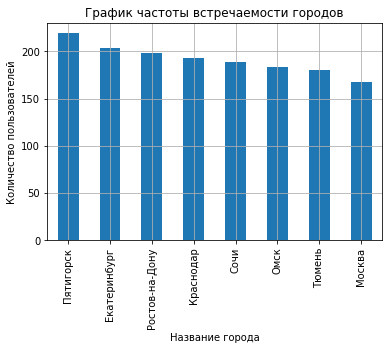

In [21]:
users.pivot_table(
    index='city', 
    values='user_id', 
    aggfunc='count').sort_values(
    by='user_id', 
    ascending=False).plot(
    kind='bar', 
    grid=True, 
    legend=False)
plt.title('График частоты встречаемости городов')
plt.ylabel('Количество пользователей')
plt.xlabel('Название города')
plt.show()

Больше всего пользователей из Пятигорска, меньше всего из Москвы.

Колебания количества пользователей из разных городов незначительны. В среднем из каждого города рассматривается 192 пользователя.

##### Построим график соотношения пользователей с подпиской и без подписки.

###### Посмотрим сколько пользователей купило подписку, а сколько пользуется приложением без подписки

In [22]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

Пользоватей с подпиской немного меньше, чем пользоватей без подписки.

###### Визуализируем данные.

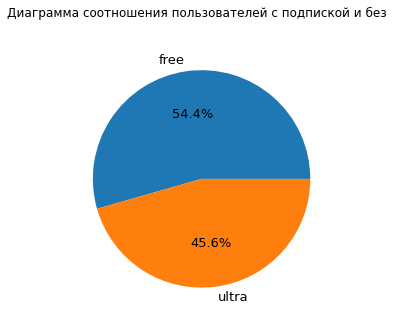

In [23]:
users.pivot_table(
    index='subscription_type', 
    values='user_id', 
    aggfunc='count'
).plot(
    kind='pie', 
    subplots=True,  
    autopct ='%1.1f%%', 
    legend=False, 
    figsize=(5,5), 
    fontsize=13, 
    ylabel='', 
    title='Диаграмма соотношения пользователей с подпиской и без');

Пользоватей с подпиской 45.6%, пользоватей без подписки 54.4%.

Создадим функцию для визуалтзации данных. На вход функция будет принимать название таблицы и столбца, три заголовка и названия осей. На выходе функция возвратит 3 описания: числовое описание столбца, диаграмму размаха и гистограмму.

In [24]:
def visual_3(df, title_1, title_2, title_3, xlabel, ylabel):
    print (title_1)
    
    display (df.describe())
    
    plt.figure(figsize=(17,3))
    sns.boxplot(
        df, 
        orient='h'
    ).set(
        title = title_2, 
        xlabel = xlabel, 
        ylabel = '')
    plt.show()
    
    plt.figure(figsize=(17,5))
    sns.histplot(
        df, 
        bins=100
    ).set(title = title_3, 
        xlabel = xlabel, 
        ylabel = ylabel)
    plt.show()

##### Рассмотрим возраст пользователей.

Числовое описание возраста пользователей:


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


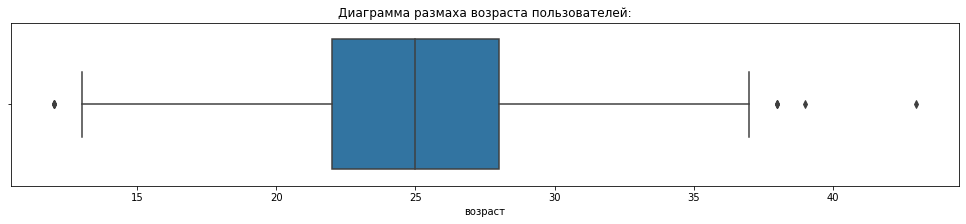

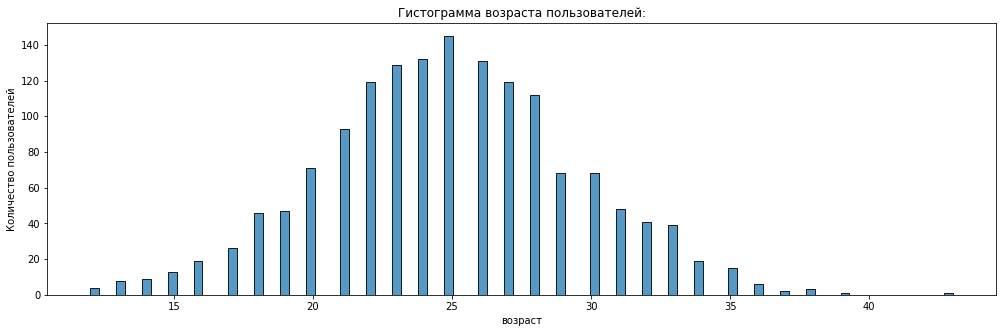

In [25]:
visual_3(users['age'],
       'Числовое описание возраста пользователей:',
       'Диаграмма размаха возраста пользователей:',
       'Гистограмма возраста пользователей:',
       'возраст',
       'Количество пользователей')

Возраст пользоватей от 12 до 43 лет, медианное и среднее значения почти равны между собой (25 и 24,9 соответсвенно).

Межквартильный размах возраста пользователей от 22 до 28 лет. В пределах нормальных значений возраст от 13 до 37 лет, есть единичные выбросы на значениях 12, 38, 39 и 43.

Распределение возраста пользователей похоже на нормальное, аномальных значений не наблюдается.

##### Рассмотрим расстояние, которое пользователь преодолел за одну поездку.

Числовое описание расстояния, которое пользователь преодолел за одну поездку:


count    18068.000000
mean      3070.659010
std       1116.832209
min          1.000000
25%       2543.000000
50%       3134.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


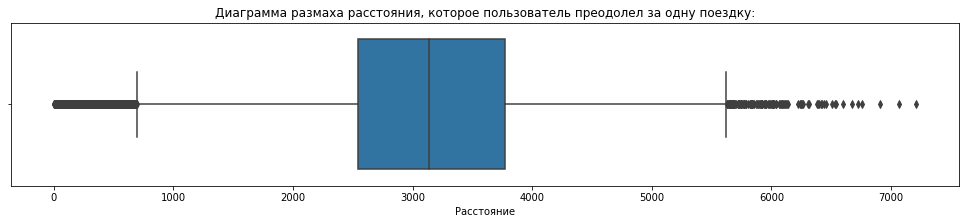

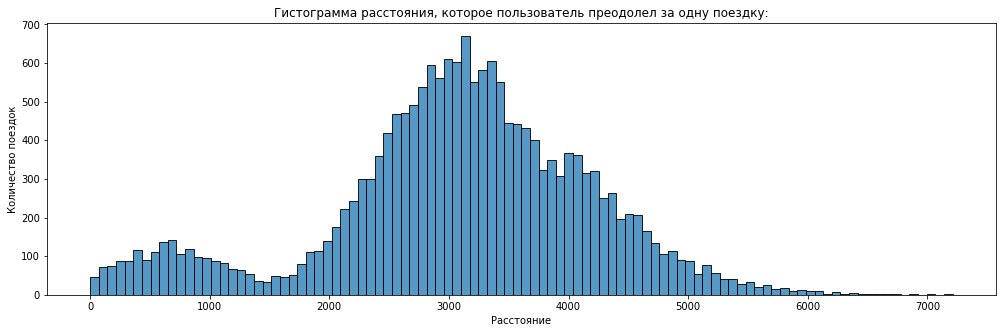

In [26]:
visual_3(rides['distance'],
       'Числовое описание расстояния, которое пользователь преодолел за одну поездку:',
       'Диаграмма размаха расстояния, которое пользователь преодолел за одну поездку:',
       'Гистограмма расстояния, которое пользователь преодолел за одну поездку:',
       'Расстояние',
       'Количество поездок')

Расстояние поездок от 1 до 7211 метров, медианное и среднее значения почти равны между собой (3134 и 3071 соответсвенно).

Межквартильный размах расстояния от 2543 до 3776 метров. В пределах нормальных значений расстояния от 1750 до 5600 метров, есть множественные выбросы на значениях от 1 до 1750 от 5600 до 6100, далее выбросы встречаются все реже до значения в 7211 метров.

Наблюдаются два пика на 600 и 3100 метров. Есть предположение что первый пик будет наблюдаться в основном у пользователей с подпиской, так как им выгоднее совершать короткие поездки, чем поьзователям без подписки, далее проверим это предположение в шаге 4.

##### Рассмотрим продолжительность поездок.

Числовое описание длительности поездок:


count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


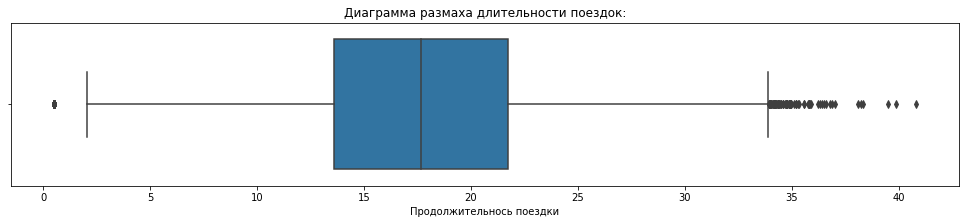

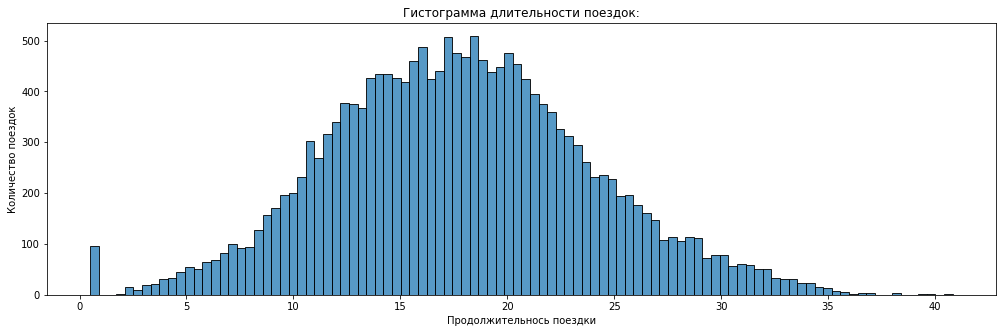

In [27]:
visual_3(rides['duration'],
       'Числовое описание длительности поездок:',
       'Диаграмма размаха длительности поездок:',
       'Гистограмма длительности поездок:',
       'Продолжительнось поездки',
       'Количество поездок')

Время поездок от 0,5 до 40,8 минут, медианное и среднее значения почти равны между собой (17,7 и 17,8 соответсвенно)

Межквартильный размах времени поездок от 14 до 22 минут. В пределах нормальных значений время поездки от 2 до 34 минут, есть множественные выбросы на значении 0,5 минут, возможно такие значения означают, что пользователь выбрал самокат, нажал старт, но никуда не поехал (скорее всего это делают пользователи с подпиской), далее проверим это предположение в шаге 4. Далее выбросы довольно часто на значениях от 34 до 37 минут, и до 41 минуты выбросы уже представляют собой единичные значения.

###### Рассмотрим внимательнее аномальное значение.

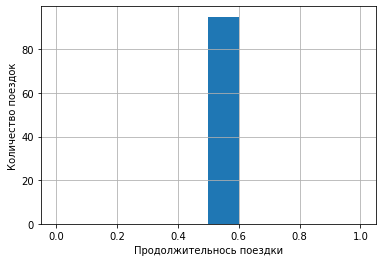

In [28]:
rides['duration'].hist(bins=10, range=(0,1)).set(xlabel='Продолжительнось поездки', ylabel='Количество поездок');

На значении 0,5 минут пик достигает 95 поездок, в шаге 4 проверим присутствует ли этот пик для обоих категорий пользователей, и если предположение о том, что пользователь выбрал самокат, нажал старт, но никуда не поехал , подтвердится удалим эти поездки из выборки.

Кроме описанной выше аномалии, распределение остальных значений напоминает нормальное, пик примерно на 17 минутах.

##### Вывод:
Больше всего пользователей из Пятигорска, меньше всего из Москвы.

Колебания количества пользователей из разных городов незначительны. В среднем из каждого города рассматривается 192 пользователя.

Пользоватей с подпиской 45.6%, пользоватей без подписки 54.4%.

Возраст пользоватей от 12 до 43 лет, медианное и среднее значения почти равны между собой (25 и 24,9 соответсвенно).

Межквартильный размах возраста пользователей от 22 до 28 лет. В пределах нормальных значений возраст от 13 до 37 лет, есть единичные выбросы на значениях 12, 38, 39 и 43.

Распределение возраста пользователей похоже на нормальное, аномальных значений не наблюдается.

Расстояние поездок от 1 до 7211 метров, медианное и среднее значения почти равны между собой (3134 и 3071 соответсвенно).

Межквартильный размах расстояния от 2543 до 3776 метров. В пределах нормальных значений расстояния от 1750 до 5600 метров, есть множественные выбросы на значениях от 1 до 1750 от 5600 до 6100, далее выбросы встречаются все реже до значения в 7211 метров.

Наблюдаются два пика на 600 и 3100 метров. Есть предположение что первый пик будет наблюдаться в основном у пользователей с подпиской, так как им выгоднее совершать короткие поездки, чем поьзователям без подписки, далее проверим это предположение в шаге 4.

Время поездок от 0,5 до 40,8 минут, медианное и среднее значения почти равны между собой (17,7 и 17,8 соответсвенно)

Межквартильный размах времени поездок от 14 до 22 минут. В пределах нормальных значений время поездки от 2 до 34 минут, есть множественные выбросы на значении 0,5 минут, возможно такие значения означают, что пользователь выбрал самокат, нажал старт, но никуда не поехал (скорее всего это делают пользователи с подпиской), далее проверим это предположение в шаге 4. Далее выбросы довольно часто на значениях от 34 до 37 минут, и до 41 минуты выбросы уже представляют собой единичные значения.

На значении 0,5 минут пик достигает 95 поездок, в шаге 4 проверим присутствует ли этот пик для обоих категорий пользователей, и если предположение о том, что пользователь выбрал самокат, нажал старт, но никуда не поехал , подтвердится удалим эти поездки из выборки.

Кроме описанной выше аномалии, распределение остальных значений напоминает нормальное, пик примерно на 17 минутах.

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях и поездках.

In [29]:
data = users.merge(rides, on='user_id', how='inner')

In [30]:
load(data)

Первые 10 строк таблицы:



,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4410,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2618,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2695,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4029,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2771,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3413,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,749,15.041884,2021-11-22,11



Иноформация о таблице:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  int64         
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.4+ MB


None


Количество дубликатов в таблице:



0


Количество пропуска в таблице:



user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

В получившейся общей таблице 18068 строк, как и было в исходной таблице "rides"

##### Создадим отдельные датафреймы с пользователями купившими и не купившими подписку.

###### Создадим датафрейм с данными о пользователях без подписки.

In [31]:
data_free = data.query('subscription_type == "free"')

In [32]:
load(data_free)

Первые 10 строк таблицы:



,user_id,name,age,city,subscription_type,distance,duration,date,month
6500,700,Айдар,22,Омск,free,2516,14.944286,2021-01-02,1
6501,700,Айдар,22,Омск,free,847,16.234663,2021-02-01,2
6502,700,Айдар,22,Омск,free,4004,20.016628,2021-02-04,2
6503,700,Айдар,22,Омск,free,1206,9.782872,2021-02-10,2
6504,700,Айдар,22,Омск,free,3047,17.427673,2021-02-14,2
6505,700,Айдар,22,Омск,free,4342,22.368009,2021-02-23,2
6506,700,Айдар,22,Омск,free,3798,18.243756,2021-03-03,3
6507,700,Айдар,22,Омск,free,2985,15.424899,2021-04-09,4
6508,700,Айдар,22,Омск,free,3360,16.765497,2021-06-12,6
6509,700,Айдар,22,Омск,free,2568,11.312160,2021-06-23,6



Иноформация о таблице:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  int64         
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 903.8+ KB


None


Количество дубликатов в таблице:



0


Количество пропуска в таблице:



user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

###### Создадим датафрейм с данными о пользователях с подпиской.

In [33]:
data_ultra = data.query('subscription_type == "ultra"')

In [34]:
load(data_ultra)

Первые 10 строк таблицы:



,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4410,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2618,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2695,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4029,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2771,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3413,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,749,15.041884,2021-11-22,11



Иноформация о таблице:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   int64         
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 507.8+ KB


None


Количество дубликатов в таблице:



0


Количество пропуска в таблице:



user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

###### Выведем числовое описание обеих таблиц.

In [35]:
data_free.describe()

,user_id,age,distance,duration,month
count,11568.000000,11568.000000,11568.00000,11568.000000,11568.000000
mean,1120.527230,24.893326,3045.49490,17.390909,6.522994
std,241.165628,4.481100,1246.17418,6.326803,3.449770
min,700.000000,12.000000,1.00000,0.500000,1.000000
25%,915.000000,22.000000,2367.00000,12.958437,4.000000
50%,1123.000000,25.000000,3115.00000,17.326890,7.000000
75%,1328.000000,28.000000,3906.00000,21.594071,9.000000
max,1534.000000,43.000000,7211.00000,34.948498,12.000000


In [36]:
data_ultra.describe()

,user_id,age,distance,duration,month
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,348.725385,24.892615,3115.443385,18.541985,6.422308
std,201.099339,4.757208,836.898137,5.572048,3.414616
min,1.000000,12.000000,244.000000,3.760353,1.000000
25%,175.000000,22.000000,2785.000000,14.524654,4.000000
50%,351.000000,25.000000,3149.000000,18.178153,6.000000
75%,525.000000,28.000000,3561.000000,21.884129,9.000000
max,699.000000,38.000000,5700.000000,40.823963,12.000000


###### Построим диаграммы размаха для пользователей обеих категорий по расстоянию поездки. 

Создадим функцию для сравнения диаграмм размаха, принимающую на вход названия двух таблиц, два заголовка и название оси х.

In [37]:
def visual_box(df_1, df_2, title_1, title_2, xlabel):
    
    plt.figure(figsize=(17,3))
    sns.boxplot(
        df_1, 
        orient='h'
    ).set(
        title = title_2, 
        xlabel = xlabel, 
        ylabel = '')
    plt.show()
    
    print (title_2)
    
    plt.figure(figsize=(17,3))
    sns.boxplot(
        df_2, 
        orient='h'
    ).set(
        title = title_2, 
        xlabel = xlabel, 
        ylabel = '')
    plt.show()
    

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


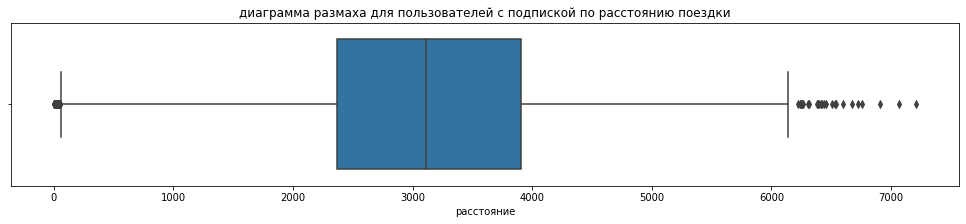

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


диаграмма размаха для пользователей с подпиской по расстоянию поездки


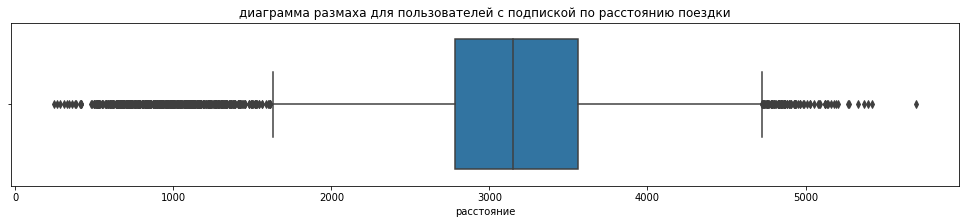

In [38]:
visual_box(data_free['distance'], 
       data_ultra['distance'], 
       'диаграмма размаха для пользователей без подписки по расстоянию поездки', 
       'диаграмма размаха для пользователей с подпиской по расстоянию поездки', 
       'расстояние')

###### Построим гистограммы для пользователей обеих категорий по расстоянию поездки. 

Создадим функцию для сравнения гистограмм, принимающую на вход названия двух таблиц, два заголовка и название осей х и у.

In [39]:
def visual_hist(df_1, df_2, title_1, title_2, xlabel, ylabel):
    
    plt.figure(figsize=(17,5))
    sns.histplot(
        df_1, 
        bins=100
    ).set(title = title_1, 
        xlabel = xlabel, 
        ylabel = ylabel)
    plt.show()
    
    plt.figure(figsize=(17,5))
    sns.histplot(
        df_2, 
        bins=100
    ).set(title = title_2, 
        xlabel = xlabel, 
        ylabel = ylabel)
    plt.show()

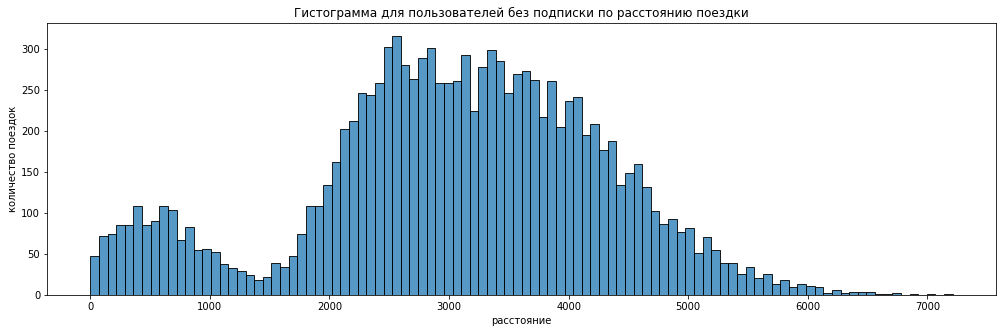

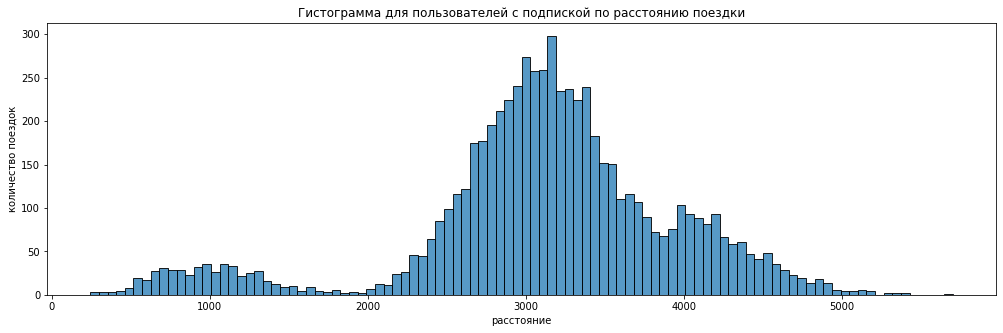

In [40]:
visual_hist(data_free['distance'], 
       data_ultra['distance'], 
       'Гистограмма для пользователей без подписки по расстоянию поездки', 
       'Гистограмма для пользователей с подпиской по расстоянию поездки', 
       'расстояние',
       'количество поездок')

Для пользователей без подписки среднее растояние поездки 3-3.1 км, межквартильный размах от 2.4 до 3.9, нормальные значения от 5 метров до 6.1 км. Часто встречаютя выбросы от 0.8 метров и единичные от 6.2 до 7.2 км. На гистаграмме два пика около 600 м высотой до 110 и около 3 км высотой до 320. 

Для пользователей с подпиской среднее растояние поездки 3.1-3.15 км, межквартильный размах от 2.8 до 3.6, нормальные значения от 1.7 до 4.7 км. Часто встречаютя выбросы снизу от 500 метров и единичные от 250 до 500 и сверху до 5.7 км. На гистаграмме два пика около 1 км м высотой до 40 и около 3,2 км высотой до 300. 

Предположение сделанное в шаге 3 (о том, что пользователи с подпиской выбирают самокат, нажимают старт, но никуда не едут) не подтвердилось. Оказалось что аномально короткие поездки наоборот совершают пользователи без подписки. Это странно, учитывая, что за старт им приходится платить по 50 рублей, возможно у них возникают какие-то трудности при использовании сервиса. Далее в шаге 4.4 рассмотрим эту проблему подробнее.

###### Построим диаграммы размаха для пользователей обеих категорий по продолжительности поездки. 

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


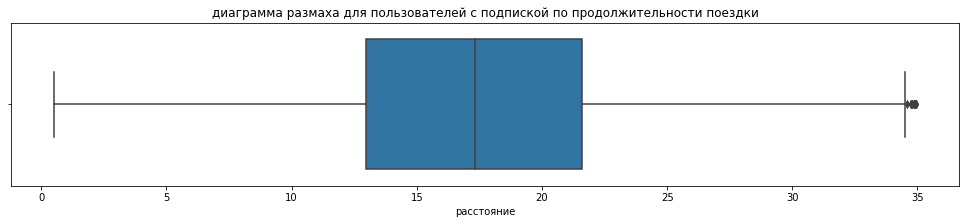

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


диаграмма размаха для пользователей с подпиской по продолжительности поездки


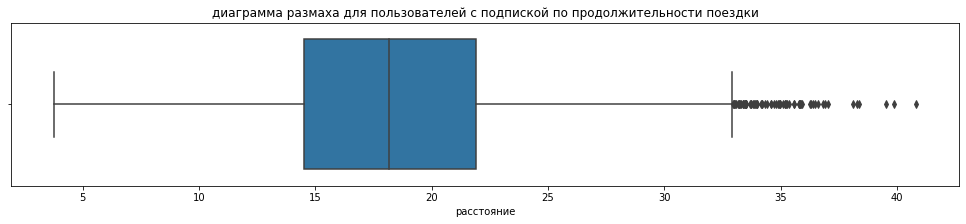

In [41]:
visual_box(data_free['duration'], 
       data_ultra['duration'], 
       'диаграмма размаха для пользователей без подписки по продолжительности поездки', 
       'диаграмма размаха для пользователей с подпиской по продолжительности поездки', 
       'расстояние')

###### Построим гистограммы для пользователей обеих категорий по продолжительности поездки. 

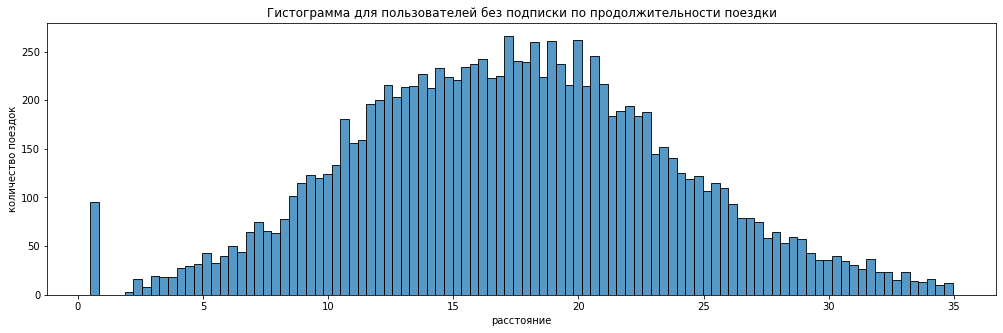

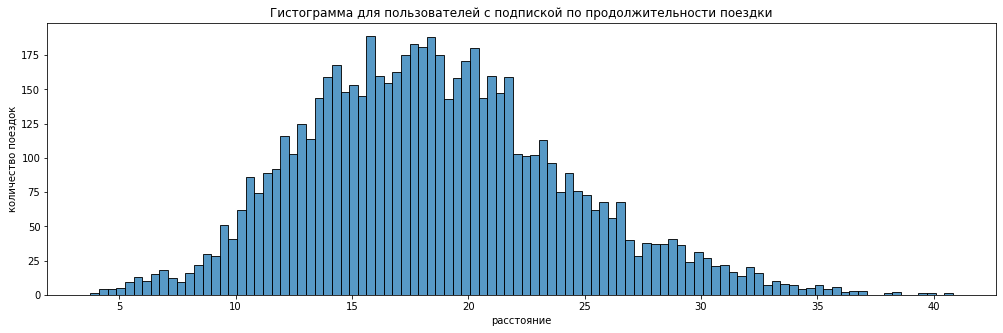

In [42]:
visual_hist(data_free['duration'], 
       data_ultra['duration'], 
       'Гистограмма для пользователей без подписки по продолжительности поездки', 
       'Гистограмма для пользователей с подпиской по продолжительности поездки', 
       'расстояние',
       'количество поездок')

Для пользователей без подписки среднее время поездки 17.3 мин, межквартильный размах от 13 до 21.6 мин, нормальные значения от 0.5 до 34.5 мин . Часто встречаютя выбросы в районе 25 мин . На гистаграмме два пика около 0.5 высотой до 90 и около 17 высотой до 290. 

Для пользователей с подпиской среднее время поездки 18.2 мин, межквартильный размах от 14.5 до 21.9, нормальные значения от 3 до 33 мин. Часто встречаютя выбросы сверху до 37 мин, далее выбросы единичные. На гистаграмме пик около 18 высотой до 190. 

Предположение сделанное в шаге 3 (о том, что пользователи с подпиской выбирают самокат, нажимают старт, но никуда не едут) не подтвердилось. Оказалось что аномально короткие поездки наоборот совершают пользователи без подписки.Это странно, учитывая, что за старт им приходится платить по 50 рублей, возможно у них возникают какие-то трудности при использовании сервиса. Далее рассмотрим эту проблему подробнее.

##### Рассмторим  подробнее аномально короткие поездки.

###### Cоздадим выборку в которую включим поездки продожительностью меньше минуты.

In [43]:
data_short = data.query('duration < 1')

In [44]:
load(data_short)

Первые 10 строк таблицы:



,user_id,name,age,city,subscription_type,distance,duration,date,month
6531,701,Иван,31,Екатеринбург,free,4196,0.5,2021-08-31,8
6570,704,Мирон,29,Ростов-на-Дону,free,4831,0.5,2021-10-14,10
6680,712,Дарья,28,Москва,free,4684,0.5,2021-03-04,3
6695,713,Святослав,30,Краснодар,free,5216,0.5,2021-02-25,2
6768,718,Владислава,31,Москва,free,5197,0.5,2021-02-11,2
6860,724,Елизавета,23,Краснодар,free,6226,0.5,2021-12-16,12
6883,726,Ольга,22,Пятигорск,free,4452,0.5,2021-03-01,3
7018,735,Кирилл,18,Пятигорск,free,4407,0.5,2021-04-13,4
7160,745,Борис,21,Ростов-на-Дону,free,5286,0.5,2021-08-17,8
7364,760,Иван,22,Ростов-на-Дону,free,4881,0.5,2021-08-29,8



Иноформация о таблице:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 6531 to 17909
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            95 non-null     int64         
 1   name               95 non-null     object        
 2   age                95 non-null     int64         
 3   city               95 non-null     object        
 4   subscription_type  95 non-null     object        
 5   distance           95 non-null     int64         
 6   duration           95 non-null     float64       
 7   date               95 non-null     datetime64[ns]
 8   month              95 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 7.4+ KB


None


Количество дубликатов в таблице:



0


Количество пропуска в таблице:



user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

In [45]:
data_short.describe()

,user_id,age,distance,duration,month
count,95.000000,95.000000,95.000000,95.0,95.000000
mean,1092.210526,25.442105,5113.168421,0.5,6.484211
std,244.028551,4.350876,658.312505,0.0,3.709858
min,701.000000,13.000000,4030.000000,0.5,1.000000
25%,901.000000,22.500000,4611.500000,0.5,3.000000
50%,1069.000000,25.000000,5053.000000,0.5,6.000000
75%,1310.500000,29.000000,5488.500000,0.5,10.000000
max,1524.000000,36.000000,7211.000000,0.5,12.000000


In [46]:
data_short['city'].value_counts()

Ростов-на-Дону    17
Москва            14
Пятигорск         13
Омск              11
Сочи              11
Тюмень            10
Краснодар         10
Екатеринбург       9
Name: city, dtype: int64

В выборку попали 95 поездок, идентификаторы, города и даты разные. Расстояние в среднем 5 км, от 4 до 7.2. Очевидно что ошибка во времени поездки. Возможно что-то не так с пользователями совершившими эти поездки.

###### Посмотрим другие поездки пользователя попавшего в выборку.

In [47]:
data.query('user_id == 701')

,user_id,name,age,city,subscription_type,distance,duration,date,month
6518,701,Иван,31,Екатеринбург,free,2676,17.470598,2021-01-23,1
6519,701,Иван,31,Екатеринбург,free,2744,14.974710,2021-02-13,2
6520,701,Иван,31,Екатеринбург,free,2894,11.891791,2021-02-20,2
6521,701,Иван,31,Екатеринбург,free,2802,16.008663,2021-03-12,3
6522,701,Иван,31,Екатеринбург,free,3509,13.081094,2021-04-17,4
6523,701,Иван,31,Екатеринбург,free,2466,14.283970,2021-05-31,5
6524,701,Иван,31,Екатеринбург,free,731,6.657051,2021-06-02,6
6525,701,Иван,31,Екатеринбург,free,3903,18.367706,2021-06-20,6
6526,701,Иван,31,Екатеринбург,free,3442,18.978076,2021-07-04,7
6527,701,Иван,31,Екатеринбург,free,1134,6.250941,2021-07-17,7


Иван из Екатеринбурга совершил 20 поездок за год, и только одна попала в выборку. Значит дело тут не в пользователе. Возможно 0.5 это не полминуты а полчаса? Посмтрим сколько в среднем проезжают пользователи за полчаса и сравним со средним в выборке.

###### Найдем среднюю скорость пользователей (рассмотрим только пользоватеелей без подписки).

In [48]:
(data_free['distance']/data_free['duration']).mean()

259.9650708023463

259 метров в минуту, или иначе 15.5 километров в час, похоже на правду.

###### Теперь найдем расстояние которое проедет пользователь за 30 минут со средней скоростью

In [49]:
(data_free['distance']/data_free['duration']).mean() * 30

7798.952124070389

При средней скорости за полчаса пользовательо проехал бы 7.8 км, а в выборке среднее значение 5 км. Не похоже что 0.5 это полчаса. Значения не получится просто заменить на 30. В таком случае для каждой строки с аномальным значением заменим его на частное расстояния и средей скорости

###### Исправим аномальные значения.

In [50]:
def duration(row):
    if row['duration'] == 0.5:
        return row['distance']/((data_free['distance']/data_free['duration']).mean())
    else:
        return row['duration']

data['duration'] = data.apply(duration, axis=1)

Так как мы исправили всего 95 значений из 18 тысяч, можно не исправлять предыдущие выводы, так как изменения повлияли на них незначительно.

##### Вывод:
На этом шаге были объединены данные о пользователях и поездках, созданы два отдельных датафрейма с данными о пользователях разных категорий, были визуализированны данные о времени и расстоянии поездок.

ДДля пользователей без подписки среднее растояние поездки 3-3.1 км, межквартильный размах от 2.4 до 3.9, нормальные значения от 5 метров до 6.1 км. Часто встречаютя выбросы от 0.8 метров и единичные от 6.2 до 7.2 км. На гистаграмме два пика около 600 м высотой до 110 и около 3 км высотой до 320. 

Для пользователей с подпиской среднее растояние поездки 3.1-3.15 км, межквартильный размах от 2.8 до 3.6, нормальные значения от 1.7 до 4.7 км. Часто встречаютя выбросы снизу от 500 метров и единичные от 250 до 500 и сверху до 5.7 км. На гистаграмме два пика около 1 км м высотой до 40 и около 3,2 км высотой до 300. 

Для пользователей без подписки среднее время поездки 17.3 мин, межквартильный размах от 13 до 21.6 мин, нормальные значения от 0.5 до 34.5 мин . Часто встречаютя выбросы в районе 25 мин . На гистаграмме два пика около 0.5 высотой до 90 и около 17 высотой до 290.

Для пользователей с подпиской среднее время поездки 18.2 мин, межквартильный размах от 14.5 до 21.9, нормальные значения от 3 до 33 мин. Часто встречаютя выбросы сверху до 37 мин, далее выбросы единичные. На гистаграмме пик около 18 высотой до 190. 

Предположение сделанное в шаге 3 (о том, что пользователи с подпиской выбирают самокат, нажимают старт, но никуда не едут) не подтвердилось. Оказалось что аномально короткие поездки наоборот совершают пользователи без подписки. Это странно, учитывая, что за старт им приходится платить по 50 рублей, возможно у них возникают какие-то трудности при использовании сервиса. Далее в шаге 4.4 рассмотрим эту проблему подробнее.

Далее была создана выборка, с аномальными значениями продолжительности поездки, куда попали 95 поездок с разными идентификаторами, городами и датами. Расстояние в выборке в среднем 5 км, от 4 до 7.2. Очевидно что ошибка во времени поездки. предположения о том что проблема в конкретных пользователях, совершивших эти поездки не подтвердилось. Предположение о неправильном формате записи (в часах а не в минутах) не подтвердилось. Было принято решение заменить аномальные значения на частное расстояния и средей скорости.

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4.

###### Сначала округлим продолжительность каждой поездки в каждой строке исходного датафрейма.

In [51]:
data['duration'] = np.ceil(data['duration'])

###### Создадим датафрейм с агрегированными данными.

In [52]:
data_gr = data.pivot_table(
    index=['user_id','month'], 
    values=['distance', 'duration', 'name', 'subscription_type'], 
    aggfunc={'distance' : sum,
             'duration' : sum,
             'name' : len,
             'subscription_type' : min}
)

###### Изменим название столбца с количеством поездок.

In [53]:
data_gr = data_gr.rename(columns={'name' : 'rides', 'subscription_type' : 'subscription'})

##### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [54]:
def income (row):
    if row['subscription'] == 'ultra':
        return row['duration']*6+199
    else:
        return row['duration']*8+row['rides']*50

In [55]:
data_gr['income'] = data_gr.apply(income, axis=1)

In [56]:
data_gr.head(10)

distance  duration  rides subscription  income
user_id month                                                
1       1          7028      42.0      2        ultra   451.0
        4           754       7.0      1        ultra   241.0
        8          6724      46.0      2        ultra   475.0
        10         5810      32.0      2        ultra   391.0
        11         7004      56.0      3        ultra   535.0
        12         6752      28.0      2        ultra   367.0
2       3         10188      63.0      3        ultra   577.0
        4          6165      40.0      2        ultra   439.0
        6          3255      14.0      1        ultra   283.0
        7          6781      48.0      2        ultra   487.0

##### Вывод:
На этом шаге был создан  датафрейм с агрегированными данными о поездках, найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.

#### Шаг 6. Проверка гипотез

##### Гипотеза 1. Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

Нулевая гипотеза: Пользователи с подпиской тратят на поездки столько же времени, сколько пользователи без подписки

Альтернативная гипотеза: Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.

In [57]:
alpha = 0.05
results = st.ttest_ind(data_ultra['duration'], data_free['duration'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.5608196633291235e-34
Отвергаем нулевую гипотезу


При уровне статистической значимости 5%, наблюдаемое значение слишком далеко от предполагаемого в нулевой гипотезе, поэтому нулевая гипотеза отвергается. Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки

##### Гипотеза 2. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

Нулевая гипотеза: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

Альтернативная гипотеза: Подписчики в среднем проезжают расстояние больше оптимального

In [58]:
ist = 3130

alpha = 0.05 

results = st.ttest_1samp(
    data_ultra['distance'], 
    dist,
    alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195649894697724
Не отвергаем нулевую гипотезу


При уровне статистической значимости 5%,  p-value превышает уровень статистической значимости, значит нулевая гипотеза не
отвергается. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

##### Гипотеза 3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Нулевая гипотеза: Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.

Альтернативная гипотеза: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [59]:
alpha = 0.05
results = st.ttest_ind(data_gr.query('subscription == "ultra"')['income'], data_gr.query('subscription == "free"')['income'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8233827279914752e-27
Отвергаем нулевую гипотезу


При уровне статистической значимости 5%, наблюдаемое значение слишком далеко от предполагаемого в нулевой гипотезе, поэтому гипотеза отвергается. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

##### Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

Это односторонняя гипотеза о равенстве средних для зависимых (парных) выборок. Для проверки этой гипотезы понадобился бы двухвыборочный t-тест для зависимых выборок с аргументом alternative='greater'.

##### Вывод:

По гипотезам сделаны следующие выводы:

Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки

Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

#### Общий вывод:

Таблица "users" содержит информаию о пользователях приложения, состоит из 1565 строк и 5 столбцов:
user_id - уникальный идентификатор пользователя

name - имя пользователя

age - возраст

city - город

subscription_type - тип подписки (free, ultra)

В таблице присутствуют целочисленные и строковые значения, пропусков в таблице нет, есть 31 дубликат.

Таблица "rides" содержит информаию о поездках  пользователей приложения, состоит из 18068 строк и 4 столбцов:
user_id - уникальный идентификатор пользователя

distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date - дата совершения поездки

В таблице присутствуют числовые и строковые значения, пропусков и дубликатов в таблице нет.

Таблица "subscriptions" содержит информаию о подписках пользователей приложения, состоит из 2 строк и 4 столбцов:
subscription_type - тип подписки

minute_price - стоимость одной минуты поездки по данной подписке

start_ride_price - стоимость начала поездки

subscription_fee - стоимость ежемесячного платежа

В таблице присутствуют целочисленные и строковые значения, пропусков и дубликатов в таблице нет.

На этапе предобработки столбец "date" таблицы "rides" был приведен к типу даты, создадан новый столбец в таблице "ride" с номером месяца на основе столбца "date", из таблицы "users" был удален 31 дубликат, были округлены расстояния в таблице "rides" и приведены к целочисленному значению.

Больше всего пользователей из Пятигорска, меньше всего из Москвы.

Колебания количества пользователей из разных городов незначительны. В среднем из каждого города рассматривается 192 пользователя.

Пользоватей с подпиской 45.6%, пользоватей без подписки 54.4%.

Возраст пользоватей от 12 до 43 лет, медианное и среднее значения почти равны между собой (25 и 24,9 соответсвенно).

Межквартильный размах возраста пользователей от 22 до 28 лет. В пределах нормальных значений возраст от 13 до 37 лет, есть единичные выбросы на значениях 12, 38, 39 и 43.

Распределение возраста пользователей похоже на нормальное, аномальных значений не наблюдается.

Расстояние поездок от 1 до 7211 метров, медианное и среднее значения почти равны между собой (3134 и 3071 соответсвенно).

Межквартильный размах расстояния от 2543 до 3776 метров. В пределах нормальных значений расстояния от 1750 до 5600 метров, есть множественные выбросы на значениях от 1 до 1750 от 5600 до 6100, далее выбросы встречаются все реже до значения в 7211 метров.

Наблюдаются два пика на 600 и 3100 метров. Есть предположение что первый пик будет наблюдаться в основном у пользователей с подпиской, так как им выгоднее совершать короткие поездки, чем поьзователям без подписки, далее проверим это предположение в шаге 4.

Время поездок от 0,5 до 40,8 минут, медианное и среднее значения почти равны между собой (17,7 и 17,8 соответсвенно)

Межквартильный размах времени поездок от 14 до 22 минут. В пределах нормальных значений время поездки от 2 до 34 минут, есть множественные выбросы на значении 0,5 минут, возможно такие значения означают, что пользователь выбрал самокат, нажал старт, но никуда не поехал (скорее всего это делают пользователи с подпиской), далее проверим это предположение в шаге 4. Далее выбросы довольно часто на значениях от 34 до 37 минут, и до 41 минуты выбросы уже представляют собой единичные значения.

На значении 0,5 минут пик достигает 95 поездок, в шаге 4 проверим присутствует ли этот пик для обоих категорий пользователей, и если предположение о том, что пользователь выбрал самокат, нажал старт, но никуда не поехал , подтвердится удалим эти поездки из выборки.

Кроме описанной выше аномалии, распределение остальных значений напоминает нормальное, пик примерно на 17 минутах.

На этом шаге были объединены данные о пользователях и поездках, созданы два отдельных датафрейма с данными о пользователях разных категорий, были визуализированны данные о времени и расстоянии поездок.

Для пользователей без подписки среднее растояние поездки 3-3.1 км, межквартильный размах от 2.4 до 3.9, нормальные значения от 5 метров до 6.1 км. Часто встречаютя выбросы от 0.8 метров и единичные от 6.2 до 7.2 км. На гистаграмме два пика около 600 м высотой до 110 и около 3 км высотой до 320.

Для пользователей с подпиской среднее растояние поездки 3.1-3.15 км, межквартильный размах от 2.8 до 3.6, нормальные значения от 1.7 до 4.7 км. Часто встречаютя выбросы снизу от 500 метров и единичные от 250 до 500 и сверху до 5.7 км. На гистаграмме два пика около 1 км м высотой до 40 и около 3,2 км высотой до 300.

Для пользователей без подписки среднее время поездки 17.3 мин, межквартильный размах от 13 до 21.6 мин, нормальные значения от 0.5 до 34.5 мин . Часто встречаютя выбросы в районе 25 мин . На гистаграмме два пика около 0.5 высотой до 90 и около 17 высотой до 290.

Для пользователей с подпиской среднее время поездки 18.2 мин, межквартильный размах от 14.5 до 21.9, нормальные значения от 3 до 33 мин. Часто встречаютя выбросы сверху до 37 мин, далее выбросы единичные. На гистаграмме пик около 18 высотой до 190.

Предположение сделанное в шаге 3 (о том, что пользователи с подпиской выбирают самокат, нажимают старт, но никуда не едут) не подтвердилось. Оказалось что аномально короткие поездки наоборот совершают пользователи без подписки. Это странно, учитывая, что за старт им приходится платить по 50 рублей, возможно у них возникают какие-то трудности при использовании сервиса. Далее в шаге 4.4 рассмотрим эту проблему подробнее.

Далее была создана выборка, с аномальными значениями продолжительности поездки, куда попали 95 поездок с разными идентификаторами, городами и датами. Расстояние в выборке в среднем 5 км, от 4 до 7.2. Очевидно что ошибка во времени поездки. предположения о том что проблема в конкретных пользователях, совершивших эти поездки не подтвердилось. Предположение о неправильном формате записи (в часах а не в минутах) не подтвердилось. Было принято решение заменить аномальные значения на частное расстояния и средей скорости.

Был создан  датафрейм с агрегированными данными о поездках, найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.

По гипотезам сделаны следующие выводы:

Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки

Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.